In [1]:
#Analise do impacto socioeconômico e racial na pandemia da COVID19 no Brasil
#Feito por Lucca Santiago Almeida e Gabriel Teixeira Guedes
#Os dados, até a data do presente estudo, estão no https://opendatasus.saude.gov.br/dataset/bd-srag-2020
#O presente arquivo é de 07 de Julho.
#Aviso Legal: Este notebook tem como finalidade apenas o estudo, deste modo não há garantia de qualquer tipo de precisão, confiabilidade ou atualidade das informações

In [2]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
filename = r'C:\Users\2269\Downloads\INFLUD-07-07-2020.csv'
df = pd.read_csv(filename, delimiter=';', 
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

c:\users\2269\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(393979, 134)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393979 entries, 0 to 393978
Columns: 134 entries, DT_NOTIFIC to PAC_DSCBO
dtypes: float64(76), int64(10), object(48)
memory usage: 330.6+ MB


In [6]:
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

troca_zona = {1.0:'Urbana', 2.0:'Rural', 3.0:'Periurbana', 9.0:'Ignorado'}

In [7]:
df.loc[(df.CS_ZONA.isnull()), 'CS_ZONA'] = 9
df['CS_ZONA'] = df['CS_ZONA'].apply(lambda x: troca_zona[x])
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['DT_NOTIFIC'].dropna(inplace=True)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave nos Estados Brasileiros')

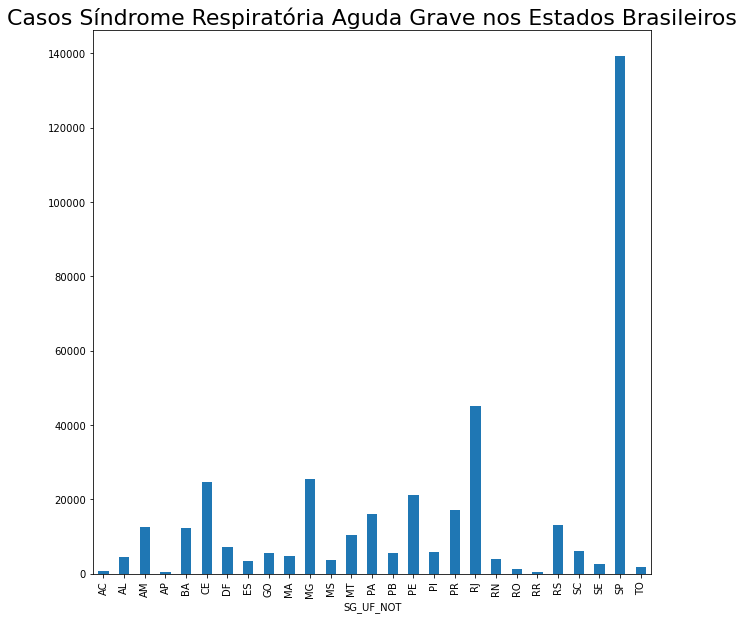

In [8]:
df.groupby(['SG_UF_NOT']).size().tail(27).plot( kind='bar', figsize=(10,10)).set_title('Casos Síndrome Respiratória Aguda Grave nos Estados Brasileiros', fontsize=22)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave por raça')

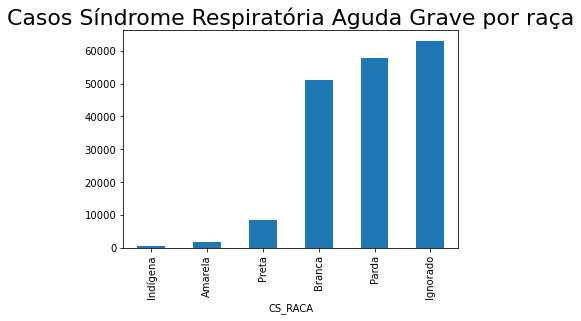

In [9]:
df.query('CLASSI_FIN=="5"').groupby('CS_RACA').size().sort_values().plot(kind='bar').set_title('Casos Síndrome Respiratória Aguda Grave por raça', fontsize=22)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave por raça no Estado do Espiríto Santo')

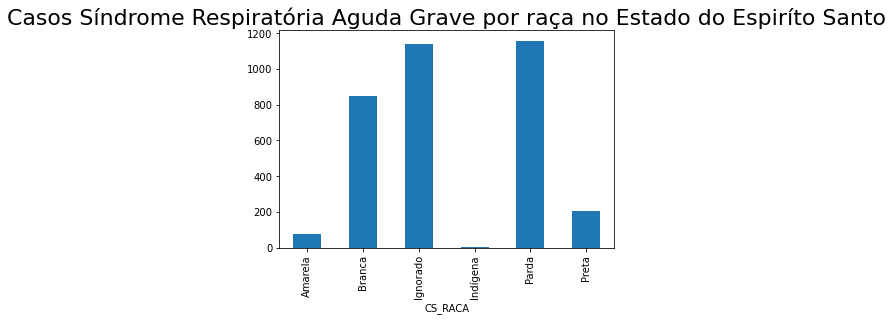

In [10]:
df.query('SG_UF_NOT == "ES"').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Síndrome Respiratória Aguda Grave por raça no Estado do Espiríto Santo', fontsize=22)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave por raça no Estado de Minas Gerais')

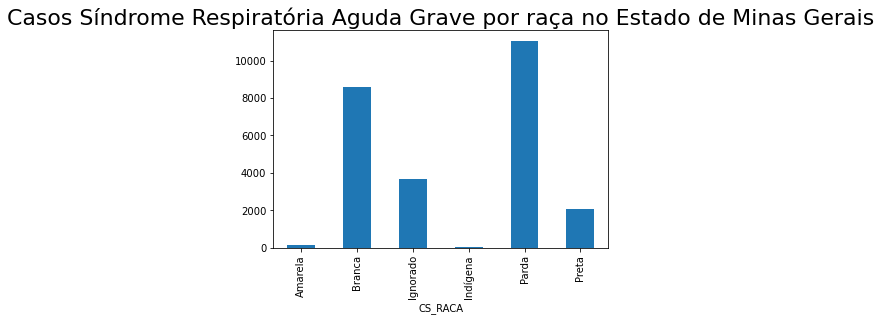

In [11]:
df.query('SG_UF_NOT == "MG"').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Síndrome Respiratória Aguda Grave por raça no Estado de Minas Gerais', fontsize=22)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave por raça no Estado do Rio De Janeiro')

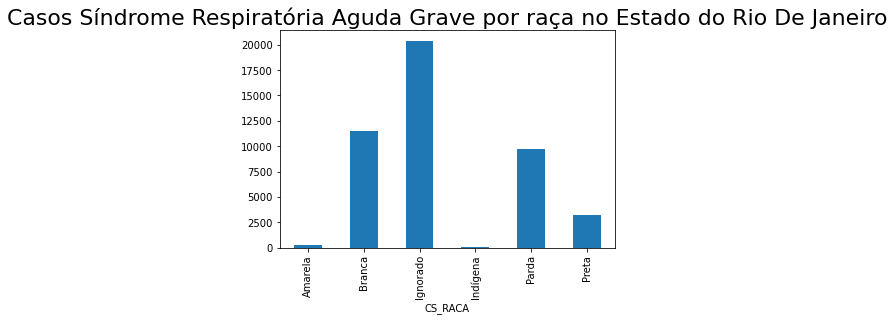

In [12]:
df.query('SG_UF_NOT == "RJ"').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Síndrome Respiratória Aguda Grave por raça no Estado do Rio De Janeiro', fontsize=22)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave por raça no Estado de São Paulo')

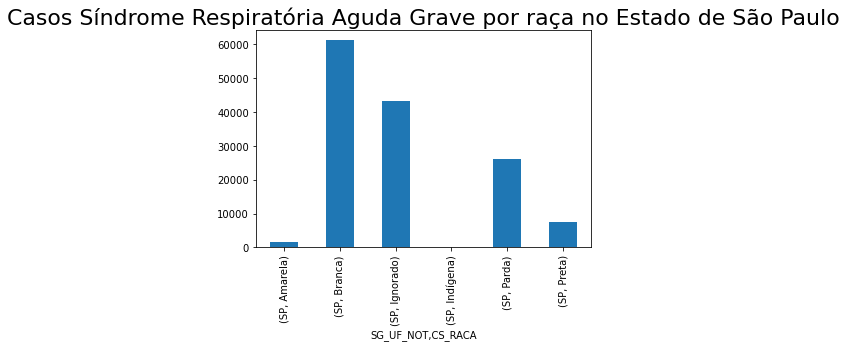

In [13]:
df.query('SG_UF_NOT == "SP"').groupby(['SG_UF_NOT','CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Síndrome Respiratória Aguda Grave por raça no Estado de São Paulo', fontsize=22)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave por raça na Estado de São Paulo')

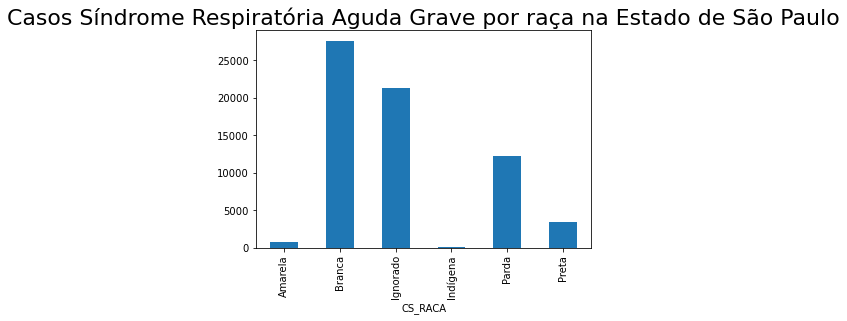

In [14]:
df.query('SG_UF_NOT == "SP" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Síndrome Respiratória Aguda Grave por raça na Estado de São Paulo', fontsize=22)

Text(0.5, 1.0, 'Casos Covid19 por raça na Cidade de São Paulo')

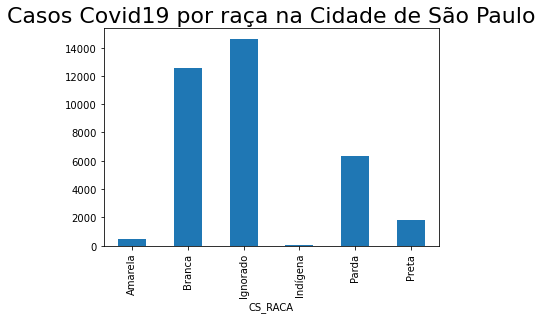

In [15]:
df.query('ID_MUNICIP == "SAO PAULO" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Cidade de São Paulo', fontsize=22)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave por raça na Cidade de São José Dos Campos')

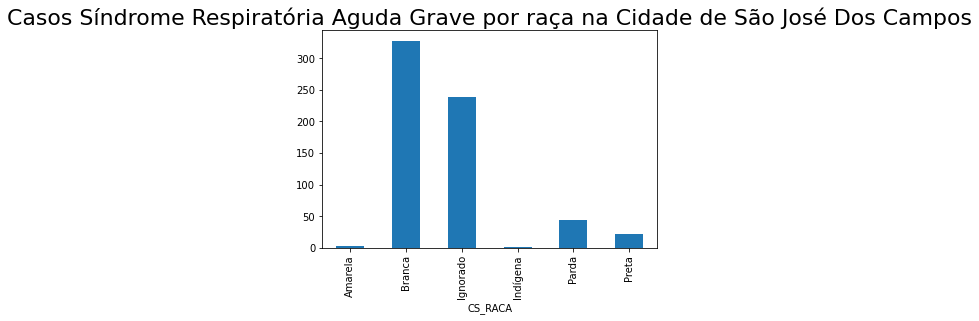

In [16]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Síndrome Respiratória Aguda Grave por raça na Cidade de São José Dos Campos', fontsize=22)

Text(0.5, 1.0, 'Casos Síndrome Respiratória Aguda Grave por raça na Cidade de Jacareí')

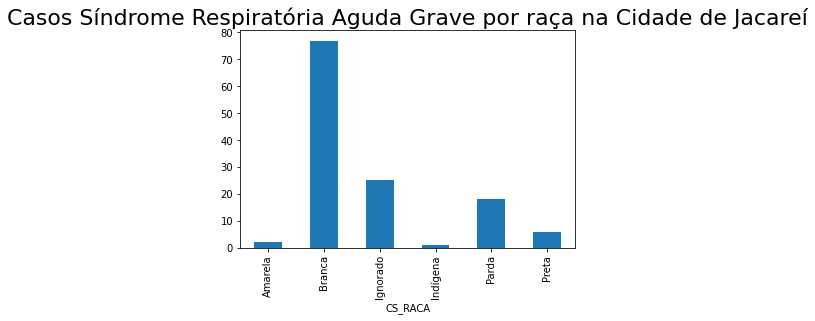

In [17]:
df.query('ID_MUNICIP == "JACAREI" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Síndrome Respiratória Aguda Grave por raça na Cidade de Jacareí', fontsize=22)

Text(0.5, 1.0, 'Casos Covid19 por raça na Cidade de Caçapava')

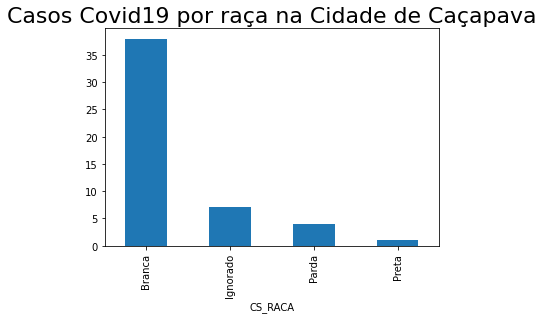

In [18]:
df.query('ID_MUNICIP == "CACAPAVA" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Cidade de Caçapava', fontsize=22)